In [29]:
import random
import torchvision.transforms as transforms
import torch.nn.functional as F
from PIL import ImageFilter
from torchvision.transforms.transforms import RandomAffine, Resize
from torchvision.datasets import ImageFolder
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
import torch
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os

In [1]:
data_path = "./Test"

In [8]:
random.seed(42)
torch.manual_seed(42)

In [19]:
test_data_tensor = torch.load('./test_data_tensor.pth')
test_labels_tensor = torch.load('./test_labels_tensor.pth')

In [20]:
test_dataset = []
for i in range(len(test_labels_tensor)):
    test_dataset.append((test_data_tensor[i], test_labels_tensor[i]))

In [21]:
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [27]:
out_features1 = 128
p = 0.5

class RESNET18(nn.Module):
    def __init__(self):
        super(RESNET18, self).__init__()

        self.resnet = nn.Sequential(*list(resnet18.children())[:-1])
        
        self.fc1 = nn.Linear(resnet18.fc.in_features, out_features1)
        self.fc2 = nn.Linear(out_features1, 30)

        self.batchnorm = nn.BatchNorm1d(out_features1)

        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = self.resnet(x)
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.batchnorm(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [32]:
model = torch.load("dropout_full_resnet18_2.pth")
model.eval()
corr = 0
total = 0
y_true = []
y_pred = []

# for data in dataloader:
for data, label in test_loader:
    predictions = model(data)
    probabilities = F.softmax(predictions, dim=1)
    prob, pred = torch.max(F.softmax(predictions, dim=1), 1)
    y_true.extend(label.cpu().numpy())
    y_pred.extend(pred.cpu().numpy())

    corr += pred.eq(label.view_as(pred)).sum().item()
    total += data.shape[0]

In [51]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'call', 'del', 'space', 'thumbsup']

In [52]:
print("Test Accuracy: {:.2f}%".format(corr/total * 100))
for i in range(6000):
    if y_true[i] != y_pred[i]:
        print("True: {}, Predicted: {}".format(letters[y_true[i]], letters[y_pred[i]]))

Test Accuracy: 99.55%
True: D, Predicted: R
True: E, Predicted: S
True: G, Predicted: Z
True: G, Predicted: H
True: H, Predicted: G
True: I, Predicted: Z
True: J, Predicted: I
True: J, Predicted: M
True: J, Predicted: Y
True: K, Predicted: V
True: K, Predicted: F
True: K, Predicted: U
True: M, Predicted: B
True: N, Predicted: S
True: N, Predicted: A
True: N, Predicted: M
True: N, Predicted: M
True: N, Predicted: S
True: N, Predicted: S
True: Q, Predicted: N
True: R, Predicted: K
True: R, Predicted: U
True: S, Predicted: A
True: T, Predicted: X
True: X, Predicted: S
True: X, Predicted: Y
True: Z, Predicted: J


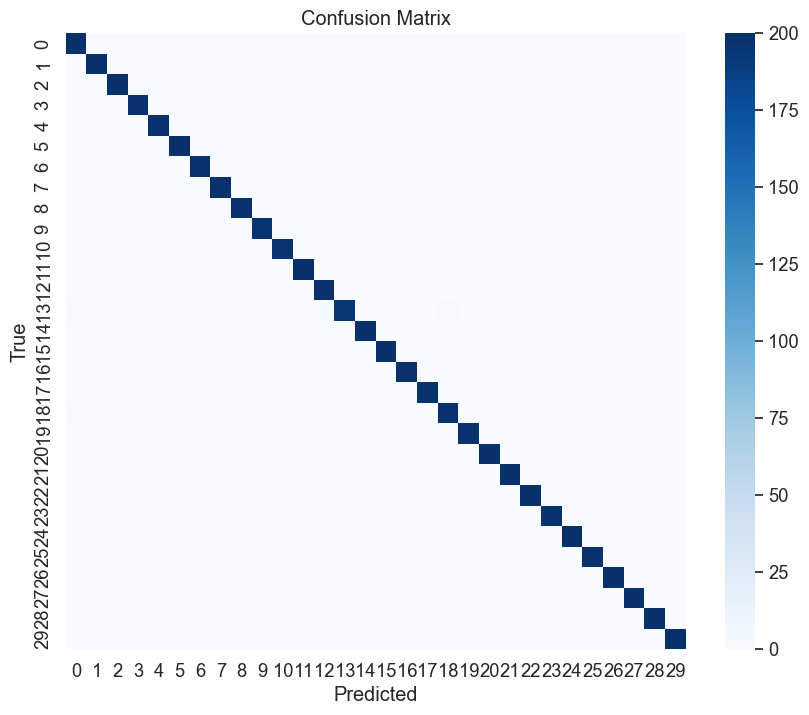

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

corr/total
y_true_np = np.array(y_true)
y_pred_np = np.array(y_pred)
# Compute confusion matrix
cm = confusion_matrix(y_true_np, y_pred_np)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.axis('off')

plt.title('Confusion Matrix')
plt.show()

In [53]:
model.cpu()

RESNET18(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)